## Todo:
    * Data cleaning including missing values, outliers and multi-collinearity.
    * Describe your fraud detection model in elaboration.
    * How did you select variables to be included in the model?
    * Demonstrate the performance of the model by using best set of tools.
    * What are the key factors that predict fraudulent customer?
    * Do these factors make sense? If yes, How? If not, How not?
    * What kind of prevention should be adopted while company update its infrastructure?
    * Assuming these actions have been implemented, how would you determine if they work?

`step` - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

`type` - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

`amount` - amount of the transaction in local currency.

`nameOrig` - customer who started the transaction

`oldbalanceOrg` - initial balance before the transaction

`newbalanceOrig` - new balance after the transaction

`nameDest` - customer who is the recipient of the transaction

`oldbalanceDest` - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

`newbalanceDest` - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

`isFraud` - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

`isFlaggedFraud` - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

## Task Done So Far

Data Cleaning  ✅


## Describe your fraud detection model in elaboration.

I tried three different model 
<ol>
<li> Logistics Regression </li>
<li> K-Nearest Neighbors </li>
<li> Random Forest Classifier </li>

Random forest performed better over other models w.r.t. F1-Score and AUC. The confusion matrix obtained with default arguments is shown below .
True Positive and True Negative results are decently classified and got `F1-score of 0.83` & `AUC of 0.93`.
    
</ol>

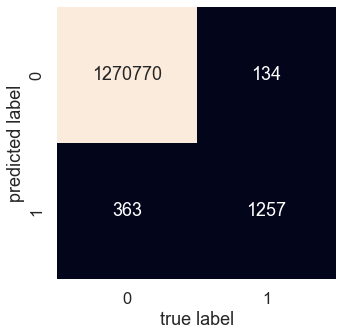

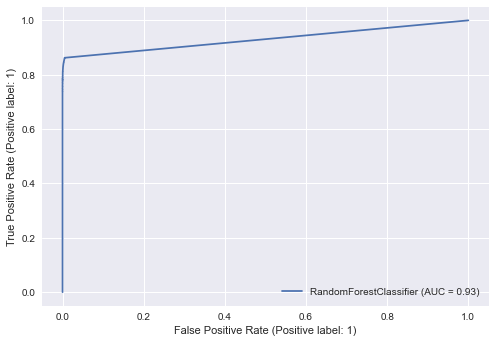

Model needed imporvement in False Negative, so tried hyperparameter tuning using `RandomiseSearchCV`

<h2>How did you select variables to be included in the model?</h2> 

I took spearman correlation between the fetaures in the dataframe based upon their correlation with each other I excluded unnecessary features. I added an additional column `hours` which contain the hours information for each day. `hours` column gives us an idea what are the most active hours in which such `Fraud` cases takes place.
<ol>
    <li>Missing information i found , at what time the initail `step` start. </li>
    <li>If known, when that initial step had started we would get insights on which days of week these Fraud cases have high frequency</li>

 </ol>

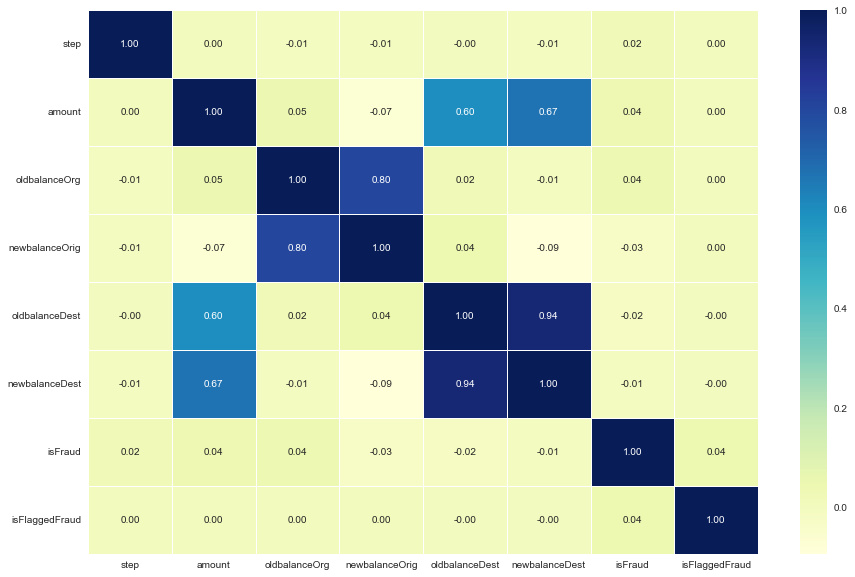

<h2> Demonstrate the performance of the model by using best set of tools.</h2>

As given `Dataset` had `6362619` sample , out of which `8213` had fraud cases but a huge sample of normal cases `6354407`. So i have used F1 score for evaluation of our model.
I have used `RandomForestClassifier` . TP and TN classification were good , but model need improement for False Negative classification.


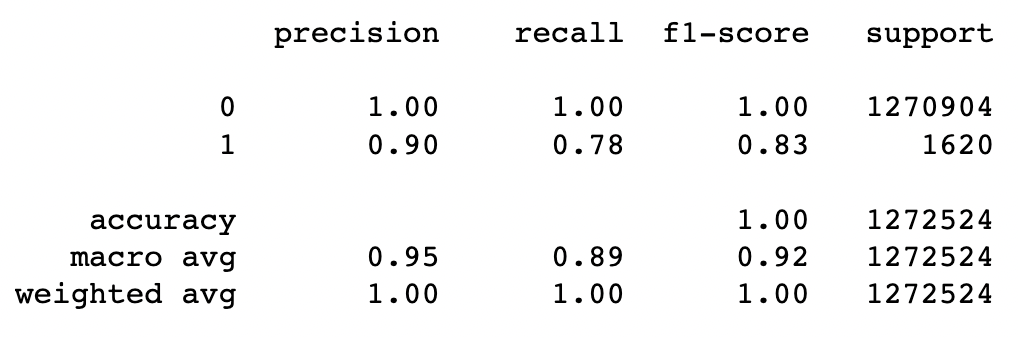

<h2>What are the key factors that predict fraudulent customer?</h2>

The key factor that predict fraudulent customer are :
  <ol>  
    <li> When ever there is a huge difference in the amount balance either significant balance change in Destination account or customer who initial the transaction  </li>
    <li>Also there are five different type of transaction , out of which 2 of them are highly associated with the fraudulent transaction i.e. `Cash Out` & `Transfer`. Both of them have approximately eqaul associativity with fraudulent transaction.</li>
    <li> I tried finding in which hours these transaction mainly occur and came to the conclusion , they occur any time during the day.</li>
    
   </ol>

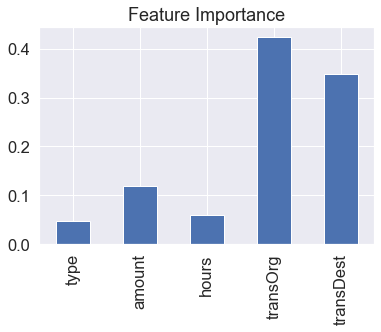

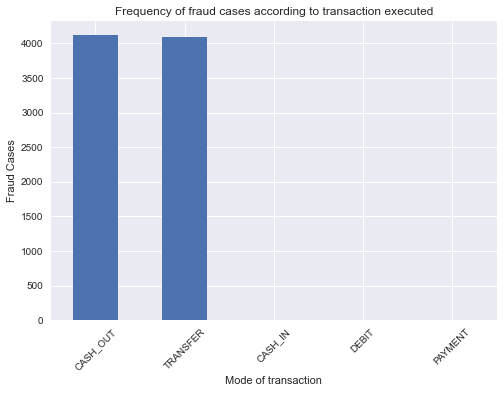

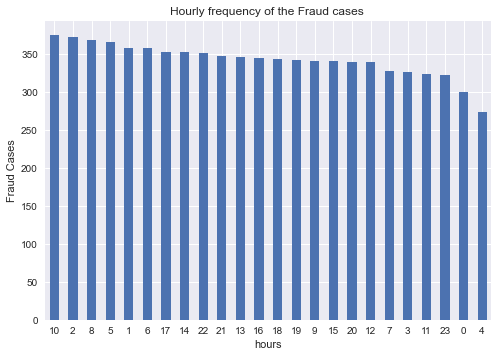

Here i have not assumend any unit for transaction

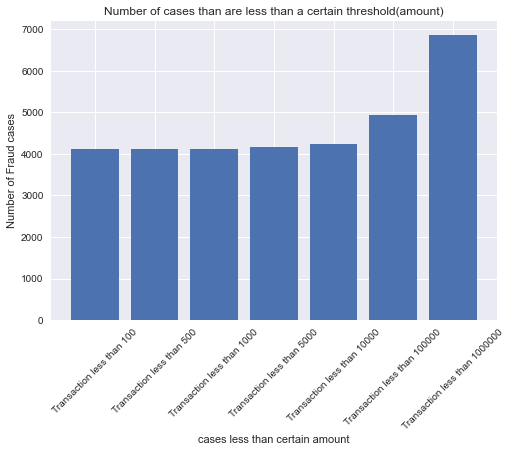

## Do these factors make sense? If yes, How? If not, How not?

Yes, these transaction makes sense .Clearly we can se from aboove bar grpah (Feature Importance) transfer amount from payment initiator's end has a significant importance , when the amount deducted from payment initiator's end is large && at the same time the destination where this amount is going had initial low balance and suddenly his balance gets increased , this falls under the fraudulent transacton category.

## What kind of prevention should be adopted while company update its infrastructure?

Following prevention should be taken care :
    <ol>
    <li> Whenever there is significant amount of balance increase is found in `Destination's` account (especially when initial bank balance was low and after a transaction it increase by a large margin) </li>
    <li>Speacial authentication should be implemented for `Cash Out` & `Transfer` types of transaction.</li>
    </ol>

## Assuming these actions have been implemented, how would you determine if they work?

We can try simulating the transfer ,to an account which has low balance and suddenly gets a transfer of huge amount such that the difference is also large for the transaction initiator (after the transaction initial should have low bank balance).

### Imports

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# We want our plots to appear in the notebook
%matplotlib inline 
plt.style.use('seaborn')
## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Loading Data

In [52]:
df = pd.read_csv("Fraud.csv")

In [53]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [54]:
len(df['step'].unique())

743

In [55]:
len(df['type'].unique())

5

In [56]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [129]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
hours             0
transOrg          0
transDest         0
dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 14 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int64   
 1   type            category
 2   amount          float64 
 3   nameOrig        category
 4   oldbalanceOrg   float64 
 5   newbalanceOrig  float64 
 6   nameDest        category
 7   oldbalanceDest  float64 
 8   newbalanceDest  float64 
 9   isFraud         int64   
 10  isFlaggedFraud  int64   
 11  hours           int64   
 12  transOrg        float64 
 13  transDest       float64 
dtypes: category(3), float64(7), int64(4)
memory usage: 851.3 MB


### Plotting Correlation Matrix

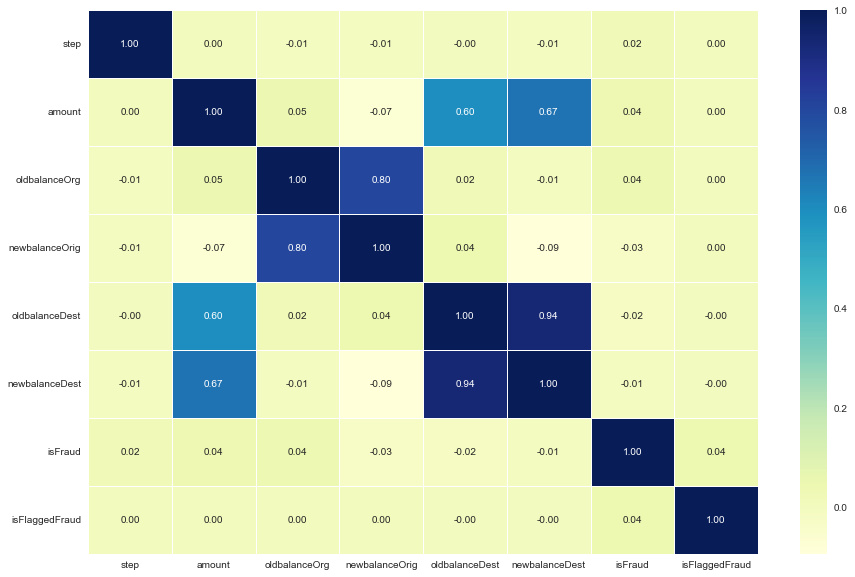

In [58]:
corr_matrix = df.corr(method='spearman')
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

### Adding Hour column

In [59]:
df['hours'] = df['step']%24

In [60]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hours
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1


In [61]:
df['hours'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0])

### Creating new columns to deteermine the difference in bank balance after the transaction

In [62]:
df['transOrg'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['transDest'] = df['newbalanceDest']  -df['oldbalanceDest'] 

In [66]:
df1 = df.loc[df['isFraud'] == 1][['type','isFraud']]

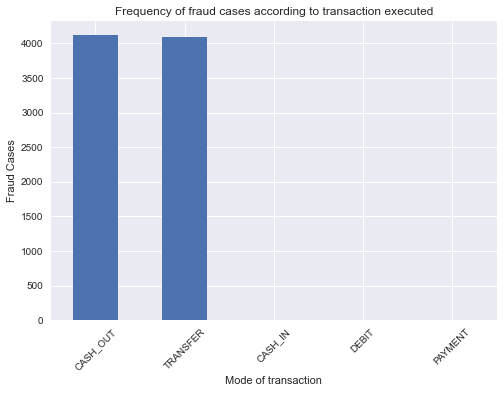

In [120]:
df1['type'].value_counts().plot(kind='bar')
plt.xticks(rotation = 45);
plt.ylabel("Fraud Cases")
plt.xlabel("Mode of transaction")
plt.title("Frequency of fraud cases according to transaction executed");

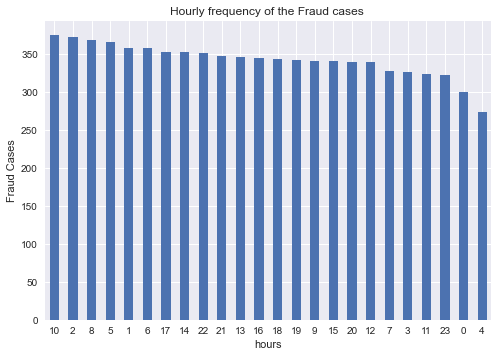

In [131]:
df2 = df.loc[df['isFraud'] == 1][['hours','isFraud']]
df2['hours'].value_counts().plot(kind='bar')
plt.xlabel("hours")
plt.ylabel("Fraud Cases")
plt.xticks(rotation = 0);
plt.title("Hourly frequency of the Fraud cases ");


In [132]:
amount = [100,500,1000,5000,10000,100000,1000000]
trans = []
value = []
for i in amount:
    df3 = df.loc[(df['isFraud'] == 1) & (df['transDest'] < i)][['transOrg','transDest','isFraud']]
    trans.append(f"Transaction less than {i}")
    value.append(len(df3))

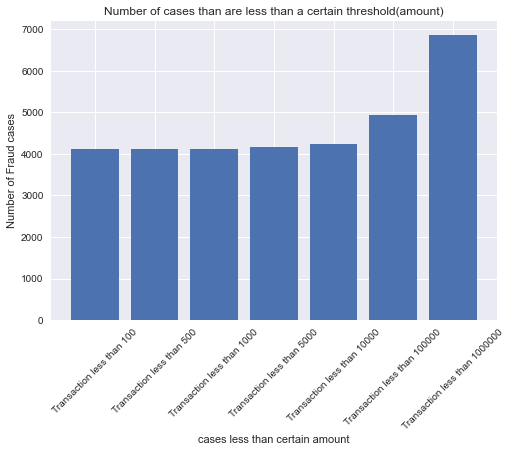

In [133]:
plt.bar(trans,value)
plt.xticks(rotation = 45)
plt.xlabel("cases less than certain amount")
plt.ylabel("Number of Fraud cases")
plt.title("Number of cases than are less than a certain threshold(amount)");

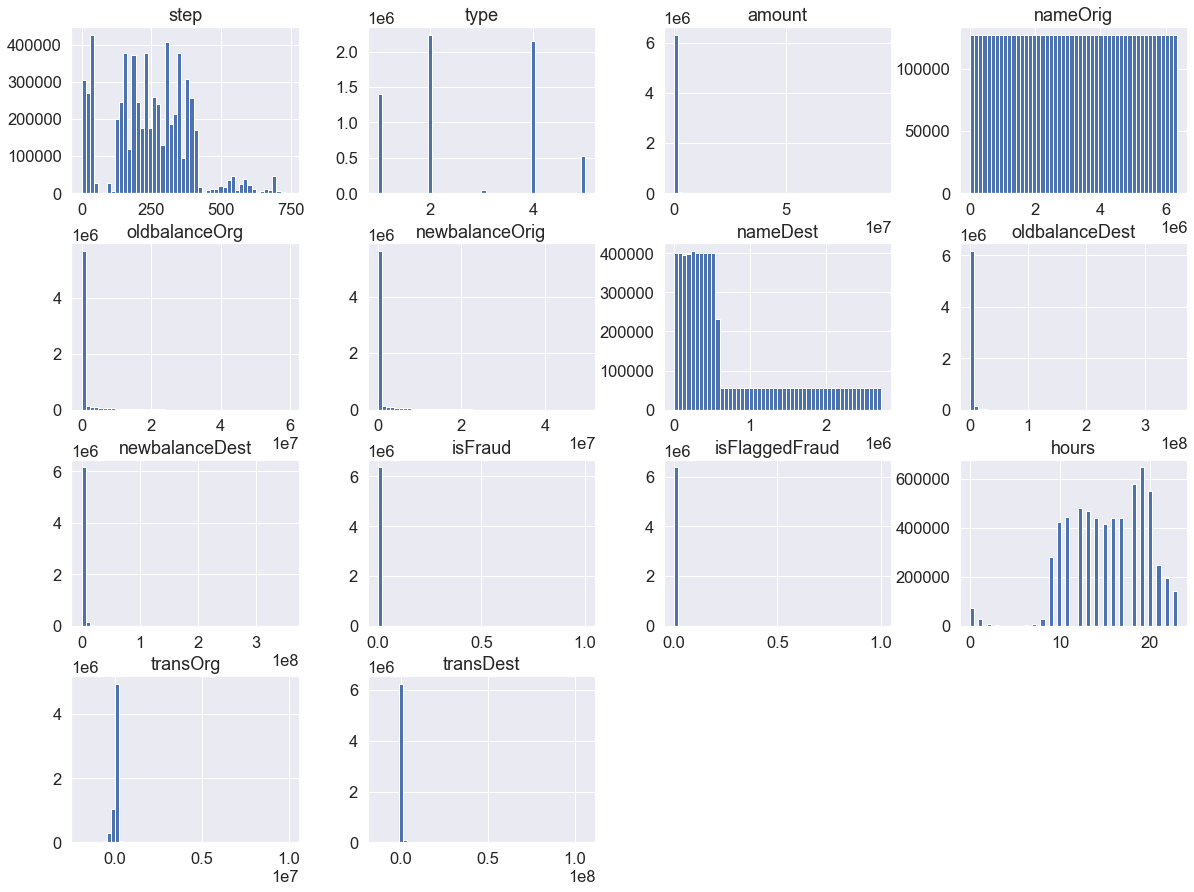

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [32]:
len(df['nameOrig'].unique()) 

6353307

In [33]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [142]:
# This will turn all of the string values into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 14 columns):
 #   Column          Dtype   
---  ------          -----   
 0   step            int64   
 1   type            category
 2   amount          float64 
 3   nameOrig        category
 4   oldbalanceOrg   float64 
 5   newbalanceOrig  float64 
 6   nameDest        category
 7   oldbalanceDest  float64 
 8   newbalanceDest  float64 
 9   isFraud         int64   
 10  isFlaggedFraud  int64   
 11  hours           int64   
 12  transOrg        float64 
 13  transDest       float64 
dtypes: category(3), float64(7), int64(4)
memory usage: 851.3 MB


In [144]:
# Turn categorical variables into numbers
for label, content in df.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes+1  

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int8   
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  hours           int64  
 12  transOrg        float64
 13  transDest       float64
dtypes: float64(7), int32(2), int64(4), int8(1)
memory usage: 588.6 MB


### Split model into test valid train split

In [146]:
X = df.drop(['isFraud','isFlaggedFraud',
             'nameOrig',
             'nameDest',
             'oldbalanceOrg',
             'newbalanceOrig',
             'oldbalanceDest',
             'newbalanceDest','step'],axis=1)

In [147]:
y = df['isFraud']

In [148]:
X.head()

,type,amount,hours,transOrg,transDest
0,4,9839.64,1,9839.64,0.0
1,4,1864.28,1,1864.28,0.0
2,5,181.00,1,181.00,0.0
3,2,181.00,1,181.00,-21182.0
4,4,11668.14,1,11668.14,0.0


In [149]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2)

## Model : 

In [150]:
clf = RandomForestClassifier()

In [151]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [152]:
y_preds = clf.predict(X_test)

/Users/mohammadkashif/Desktop/tensorflow-test/env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


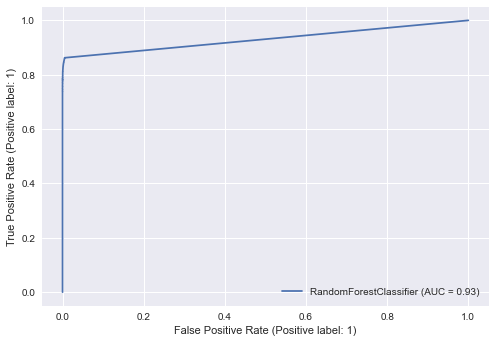

In [153]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(clf, X_test, y_test);

In [154]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[1270770     134]
 [    363    1257]]


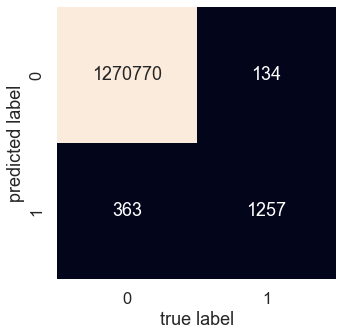

In [155]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),fmt=".0f",
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [156]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.90      0.78      0.83      1620

    accuracy                           1.00   1272524
   macro avg       0.95      0.89      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



### Hyperparameter Tuning for Random Forest

In [157]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
# Find the best parameters
rs_rf.best_params_

In [ ]:
rs_y_preds = rs_rf.predict(X_test)

In [ ]:
# Show classification report
print(classification_report(y_test, rs_y_preds))

### Feature Importance

In [65]:
k = clf.feature_importances_

In [69]:
clf.feature_importances_

array([0.04757915, 0.11969147, 0.06040698, 0.42329216, 0.34903024])

In [68]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'hours', 'transOrg', 'transDest'],
      dtype='object')

In [70]:
# Match features to columns
features_dict = dict(zip(X_train.columns, list(clf.feature_importances_)))


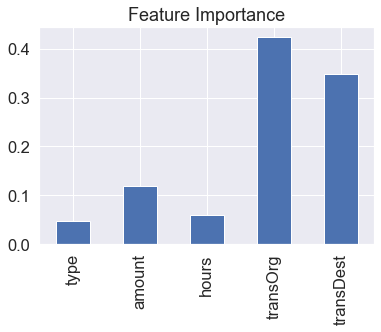

In [71]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);